In [1]:
import pandas as pd
import csv
import matplotlib as mp
import seaborn as sns

           benchmark             emulator       time        type  threads  \
0  0       histogram               native   491908.0  map-reduce        2   
   1       histogram             Arancini  3415065.0  map-reduce        2   
   3       histogram  Arancini-Native-Mem  3440359.0  map-reduce        2   
   5       histogram              Risotto  3910357.0  map-reduce        2   
   6       histogram         Risotto-qemu  4646344.0  map-reduce        2   
...              ...                  ...        ...         ...      ...   
11 353  string_match  Arancini-Native-Mem   346671.0  map-reduce        8   
   355  string_match              Risotto   759812.0  map-reduce        8   
   356  string_match         Risotto-qemu   788720.0  map-reduce        8   
   357  string_match      Risotto-nofence   639304.0  map-reduce        8   
   359  string_match   Risotto-Native-Mem   784400.0  map-reduce        8   

       version  normalized_time  
0  0      main         0.989966  
   1   

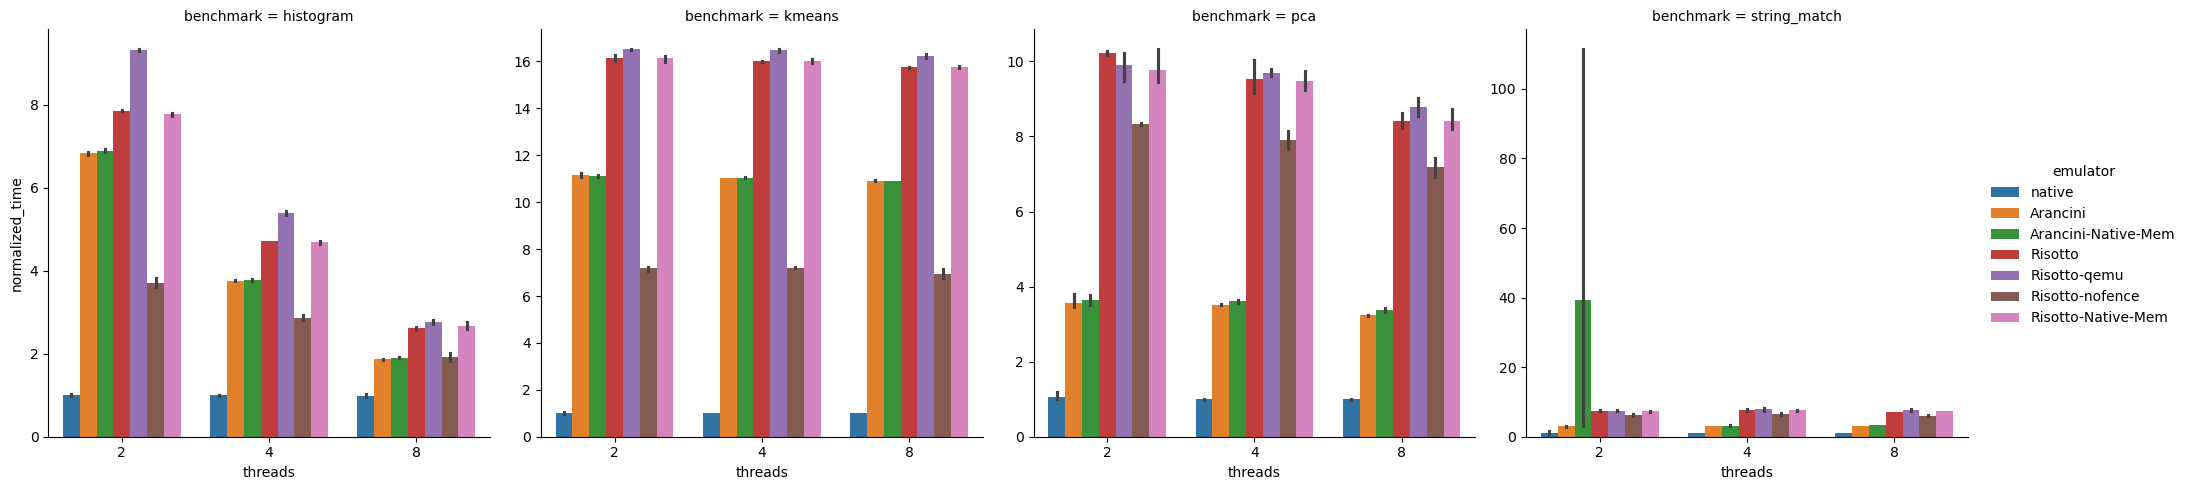

In [3]:
csvfile = open("../bench/latest/times.csv", "r")
df = pd.read_csv(csvfile)
df["version"] = "main"

def normalize(s):
    tmp = s
    base = s[s["emulator"]=="native"]
    tmp["normalized_time"] = tmp["time"].map(lambda l: l/base["time"].median())
    return tmp

df.drop(df[df["time"]==-1.0].index, inplace=True)

df.drop(df[df["emulator"]=="QEMU"].index, inplace=True)
df.drop(df[df["emulator"]=="Risotto-tso"].index, inplace=True)
df.drop(df[df["emulator"]=="Arancini-nlock"].index, inplace=True)
df.drop(df[df["emulator"]=="Arancini-nmem"].index, inplace=True)
df.drop(df[df["emulator"]=="Risotto-nmem"].index, inplace=True)
df.drop(df[df["emulator"]=="Risotto-nlock"].index, inplace=True)

#df.drop(df[df["emulator"]=="Risotto-nofence"].index, inplace=True)
#df.drop(df[df["benchmark"]=="matrix_multiply"].index, inplace=True)
#df.drop(df[df["threads"]!=8].index, inplace=True)

df = df.groupby(["benchmark", "threads"], as_index=False)[df.columns].apply(normalize)

mr = df[(df["type"]=="map-reduce")]
sns.catplot(data=mr, x="threads", y="normalized_time", hue="emulator", col="benchmark", kind="bar", sharey=False)


#sns.catplot(data=mr, x="threads", y="time", hue="emulator", legend=None, col="benchmark", kind="bar", sharey=False)

#for i,bar in enumerate(ax.patches):
#    bar.set_hatch(hatches[int(i/4)])
#for i,bar in enumerate(ax.get_legend().legend_handles):
#    bar.set_hatch(hatches[int(i)])


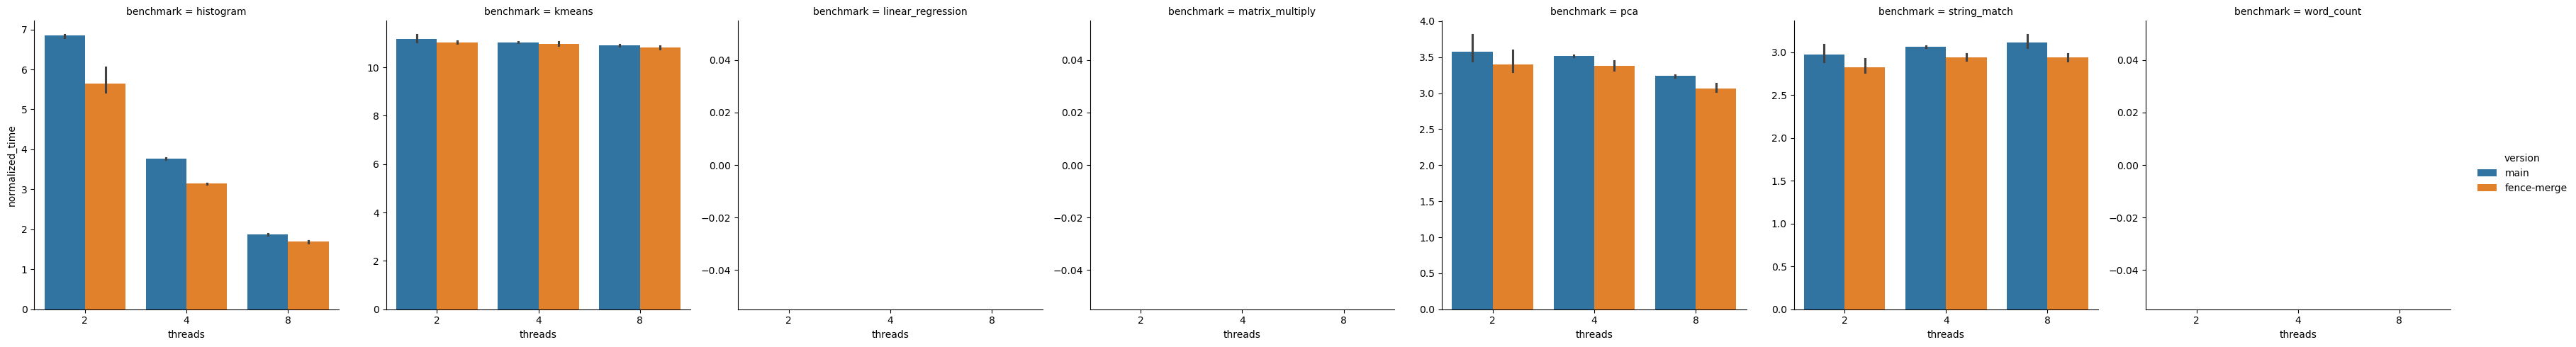

In [12]:
csvfile = open("../bench/fence-merge/times.csv", "r")
bf = pd.read_csv(csvfile)
bf["version"] = "fence-merge"
bf.drop(bf[bf["emulator"]!="Arancini"].index, inplace=True)
bf.drop(bf[bf["time"]==-1.0].index, inplace=True)

cf = pd.concat([df, bf])
cf = cf.groupby(["benchmark", "threads"], as_index=False)[cf.columns].apply(normalize)

cf.drop(cf[cf["emulator"]!="Arancini"].index, inplace=True)

sns.catplot(data=cf, x="threads", y="normalized_time", hue="version", col="benchmark", kind="bar", sharey=False)